# 1. KODEX200 Buy & Hold

In [1]:
import pandas as pd
import numpy as np

# Main

### csv 파일 읽어오기

In [2]:
df = pd.read_csv("KODEX200_monthly_data.csv", encoding="utf-8")

### Index는 datetime 형으로 변환하기

In [3]:
df.index = pd.to_datetime(df["Date"])
df.head()

,Date,Open,High,Low,Close,Volume,Change
Date,,,,,,,
2010-01-29,2010-01-29,19052,19066,18668,18742,2717811,-0.026996
2010-02-26,2010-02-26,18611,18683,18514,18559,974615,0.000431
2010-03-31,2010-03-31,19853,19858,19729,19789,883019,-0.003776
2010-04-30,2010-04-30,20331,20403,20313,20377,758179,0.007814
2010-05-31,2010-05-31,18887,19126,18882,19134,1979678,0.012220


### CAGR, MDD 구하기

In [4]:
# 포트폴리오, CAGR구하기
# The $1,000 would be the F in our formula, L would be $1,980 and N would be 6 (number of years).
y = df.index.year.unique()
포트폴리오CAGR = (df["Close"][-1]/df["Close"][0])**(1/len(y))-1


In [5]:
# KODEX200 MDD 구하기
# We are going to use a trailing 252 trading day window
window = len(df)

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = df['Close'].rolling(window, min_periods=1).max()
Roll_Max.rename("Roll_Max", inplace=True)
Monthly_KODEX200_Drawdown = df['Close']/Roll_Max - 1.0
Monthly_KODEX200_Drawdown.rename("KODEX200 Daily_Drawdown", inplace=True)

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_KODEX200_Monthly_Drawdown = Monthly_KODEX200_Drawdown.rolling(window, min_periods=1).min()
Max_KODEX200_Monthly_Drawdown.rename("KODEX200 Max_Monthly_Drawdown", inplace=True)

print ("KODEX200 CAGR {:.2%} ".format(포트폴리오CAGR))
print ("KODEX200 MDD {:.2%}".format(Max_KODEX200_Monthly_Drawdown[-1]))

KODEX200 CAGR 3.41% 
KODEX200 MDD -20.68%


### Monthly & Max MDD

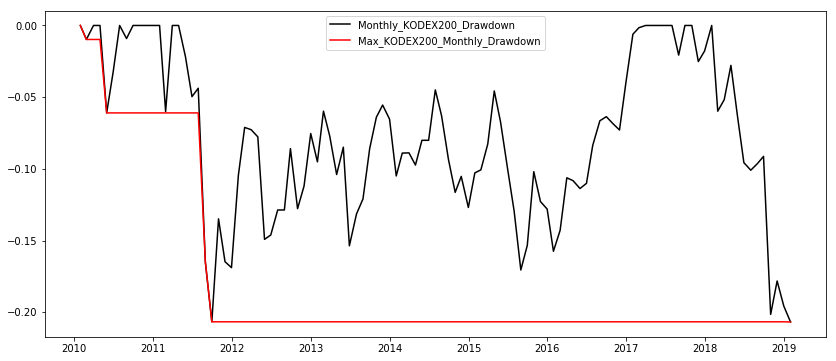

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(Monthly_KODEX200_Drawdown,color="Black",label="Monthly_KODEX200_Drawdown");
ax.plot(Max_KODEX200_Monthly_Drawdown,color="Red", label="Max_KODEX200_Monthly_Drawdown");
ax.legend()

### 그래프 그리기

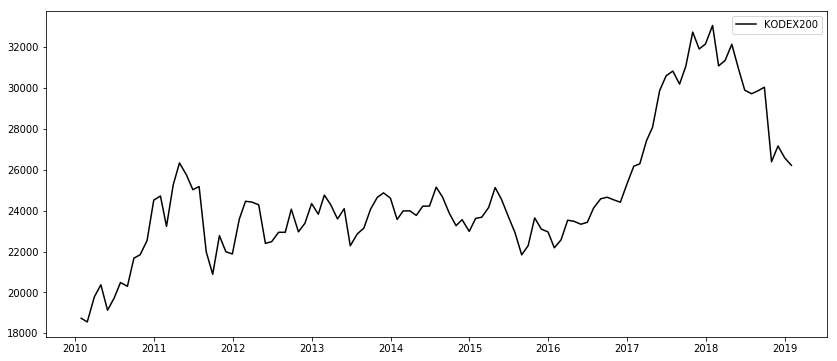

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df["Close"],color="Black",label="KODEX200");
ax.legend()